# Interaktive Darstellung der Faltung (zum Vergleich mit KKF)
Definition der Faltung: 
$$f(t)\ast g(t) = \int_{-\infty}^{\infty}f(\tau)\cdot g(t-\tau)dt$$

$g(t)$ wird an der y-Achse gespiegelt ('gefaltet') und über $f(t)$ geschoben. Beide Signale werden miteinander multipliziert, über das Produkt wird integriert. Die Faltung ist kommutativ.

Das dritte Scenario ("f(t) gespiegelt") entspricht im Ergebnis der Kreuzkorrelation: $f(-t)\ast g(t)=f(t)\star g(t)$.




Output()

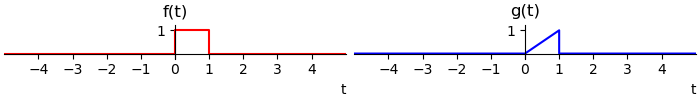

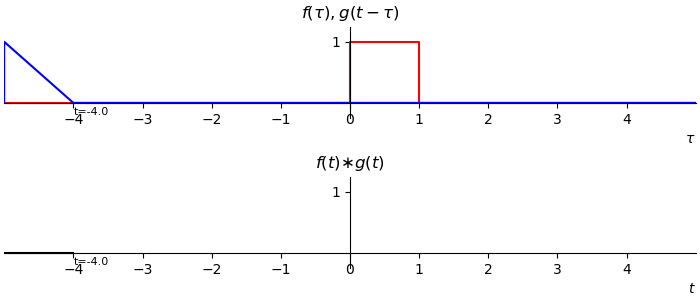

In [1]:
"""
(c) Benno Dömer | HS Pforzheim 2023 
Achtung: Code ist aus "Kreuzkorrelation.ipynb" hergeleitet mit Minimalaufwand, daher insbesondere nicht 
geeignet, um die Kreuzkorrelation oder Faltung zu verstehen. Das grafische Ergebnis schon.

"""
# 'widget' für interaktive Plots
%matplotlib widget 

# Import so, dass möglichst viele Funktionen "wie in Matlab" zur Verfügung stehen:
from numpy import (pi, cos, zeros, ones) # numpy für's Rechnen, bei Bedarf anpassen
import numpy as np
from matplotlib.pyplot import (figure, plot, stem, legend, text, xticks, yticks, 
                               grid, xlabel, ylabel, subplot, title, clf, cla, xlim, ylim) # matpotlib für's  Plotten, bei Bedarf anpassen
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

#figure(figsize=(7, 1), dpi=100, 
#       layout='constrained',num=' ') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    xlim(-5,5)
    ylim(-.25, 1.25)
    xticks(np.arange(-4,5,1))
    yticks((1.0,))


# Rect- und Dreieckssignale
ts = np.array([-15, 0, 0, 1, 1, 15])
srect = np.array( [0, 0, 1, 1, 0, 0])
stri  = np.array( [0, 0, 0, 1, 0, 0])


# Faltungsergebnis (modifiziert aus KKF)
t=np.arange(-5,5,0.05)
res = t*0
res=0.5*(t**2+2*t+1) # für Bereich zwischen -1 und 0
res[t>0]= 0.5*(1-t[t>0]**2)
res[t>1]=0
res[t<-1]=0
res = np.roll(res,int(1/0.05))

figure(figsize=(7, 1), dpi=100, 
       layout='constrained',num='f,g') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen
#Plot Signal 1
xl='t'
pstyle = 'r'
ax1 = subplot(1,2,1) 
s1h,=plot(ts,srect,pstyle)
xlabel(xl,loc='right')
title('f(t)')           
myplotstyle(ax1)

#Plot Signal 2
pstyle = 'b'
ax1 = subplot(1,2,2) 
s2h, = plot(ts,stri,pstyle)
xlabel(xl,loc='right')
title('g(t)')           
myplotstyle(ax1)

#plot moving sigs and cross corr
figure(figsize=(7, 3), dpi=100, 
       layout='constrained',num='Faltung') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen

xl = '$\u03C4$'
yl = '$f(\u03C4), g(t-\u03C4)$'

ax1 = subplot(2,1,1) 
fh, = plot(ts,srect,'r')
gh, = plot(ts,stri,'b')
taut1=ax1.text(0,1,'',color='k',fontsize=8,ha='left') # Markierung für Tau

myplotstyle(ax1)
xlabel(xl,loc='right')
title(yl)


xl = '$t$'
yl = '$f(t) \u2217 g(t)$'
ax1 = subplot(2,1,2) 
pl, = plot(t,res,'k')
taut2=ax1.text(0,1,'',color='k',fontsize=8,ha='left') # Markierung für Tau

myplotstyle(ax1)
xlabel(xl,loc='right')
title(yl)

def plotdata2(t0,scen): # update data
    #scenario switcher
    s1 = srect
    s2 = stri
    sres = res
    ts1 = 0
    ts2 = 0
    tcorr = 0
    
    if scen=='gf':
        s1 = stri
        s2 = srect
    elif scen=='ftg':
        ts1 = 2
        ts2 = 0
        sres = np.roll(res,int(ts1/0.05))
    elif scen=='fgs':
        ts1 = -1
        sres = np.roll(res,int(-1/0.05))
    
    s1h.set_xdata(ts+ts1)
    s1h.set_ydata(s1)
    s2h.set_xdata(ts+ts2)
    s2h.set_ydata(s2)
    taut1.set_text(f't={t0:.1f}')
    taut1.set_position((t0,-.2))
    
    pl.set_xdata(t[t<t0])
    pl.set_ydata(sres[t<t0])
    taut2.set_text(f't={t0:.1f}')
    taut2.set_position((t0,-.2))
    
    fh.set_xdata(ts+ts1) 
    fh.set_ydata(s1)
    gh.set_xdata(-ts+t0+ts2)
    gh.set_ydata(s2)
    
# Interaktion: 
# Definition von Controls: 
tslider2  = widgets.FloatSlider(min=-4, max=4, step=0.1, value=-4, continuous_update=True, description='$t$')
scencombo2 = widgets.Dropdown(options=[('Basis','fg'), 
                                      ('vertauscht', 'gf'),
                                      ('f(t) gespiegelt','fgs')],value='fg',description='Scenario')

# Arrangieren hier in horizontaler Box:
ui2 = widgets.HBox([tslider2, scencombo2])
#Verknüpfen mit Callback
out2 = widgets.interactive_output(plotdata2, { 'scen':scencombo2, 't0': tslider2 }) 
#Anzeigen
display(ui2,out2)

